In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\CNP\CNP_AE_20.xlsx', header=None,names=column_names)
df

,column 1,column 2
0,-0.45866,-1.23520
1,0.24348,NaN
2,0.25071,-0.80803
3,0.21462,-0.95198
4,0.12829,-1.03140
...,...,...
3995,0.89265,NaN
3996,0.74741,NaN
3997,1.07660,NaN
3998,0.70388,NaN


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	0
float64		column 2	1600


In [4]:
df.describe()

,column 1,column 2
count,4000.000000,2400.000000
mean,0.006711,0.004444
std,0.726242,0.805044
min,-1.714600,-1.376500
25%,-0.500103,-0.788095
50%,0.013352,-0.019133
75%,0.553305,0.798878
max,1.363900,1.344400


<AxesSubplot:>

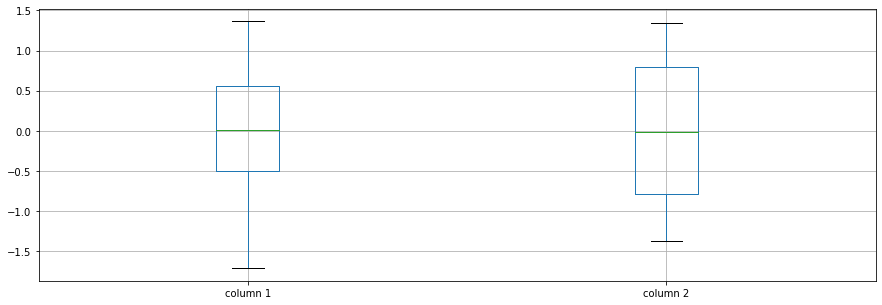

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    0.006711
column 2    0.004444
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2
column 1,1.000000,-0.024513
column 2,-0.024513,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [10]:
imputer = md.Midas(layer_structure = [2,2+57,2+57+57,2+57+57+57,2+57+57+57+57,2+57+57+57,2+57+57,2+57,2], vae_layer = False, seed = 20)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [2]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 1.2001137607097625
Epoch: 1 , loss: 1.1985993909835815
Epoch: 2 , loss: 1.193808981657028
Epoch: 3 , loss: 1.1383504557609558
Epoch: 4 , loss: 1.1256110248565674
Epoch: 5 , loss: 1.1284326555728912
Epoch: 6 , loss: 1.1208154332637787
Epoch: 7 , loss: 1.1177619092464448
Epoch: 8 , loss: 1.118706750869751
Epoch: 9 , loss: 1.105975071668625
Epoch: 10 , loss: 1.1099970095157623
Epoch: 11 , loss: 1.1154972722530365
Epoch: 12 , loss: 1.1034739785194396
Epoch: 13 , loss: 1.108102254629135
Epoch: 14 , loss: 1.1115193965435028
Epoch: 15 , loss: 1.106859165430069
Epoch: 16 , loss: 1.0985914280414582
Epoch: 17 , loss: 1.1009503235816955
Epoch: 18 , loss: 1.1022041201591493
Epoch: 19 , loss: 1.1060900473594666
Epoch: 20 , loss: 1.0912541165351868
Epoch: 21 , loss: 1.1002416162490845
Epoch: 22 , loss: 1.1004591820240022
Epoch: 23 , loss: 1.1001935775279998
Epoch: 24 , loss: 1.108002112865448
Epoch: 25 , loss: 1.1023

In [11]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(4000, 2)

In [12]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    0.025127
column 2   -1.258200
Name: 21, dtype: float64

In [13]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\CNP.xlsx', header=None,names=column_names)

In [14]:
new_df-complete_df

,column 1,column 2
0,0.0,0.000000
1,0.0,0.864213
2,0.0,0.000000
3,0.0,0.000000
4,0.0,0.000000
...,...,...
3995,0.0,-0.645633
3996,0.0,-0.423397
3997,0.0,-0.561484
3998,0.0,-0.456823


Calculating NRMSE Value

In [15]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [16]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [17]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(25.30849336004541, 64.9340549279942)

In [18]:
NRMS=numerator/denominator
NRMS


0.38975686006534116

In [19]:
new_df.iloc[66,:]

column 1    0.12305
column 2   -1.03610
Name: 66, dtype: float64

In [20]:
imputations[-1]


,column 1,column 2
0,-0.45866,-1.235200
1,0.24348,-0.008917
2,0.25071,-0.808030
3,0.21462,-0.951980
4,0.12829,-1.031400
...,...,...
3995,0.89265,-0.367603
3996,0.74741,0.005133
3997,1.07660,-0.475776
3998,0.70388,-0.105403


In [21]:
imputations[-1].to_excel("CNP_AE_20(imp).xlsx", index=False, header=False)